In this notebook we find the center of mass of a tree log.

In [1]:
# import the necessary packages
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray  
from scipy import ndimage
import glob

Downloading and plotting the log:

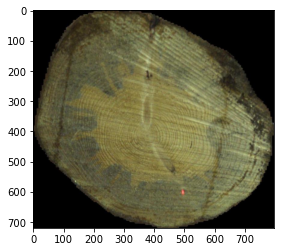

In [2]:
img = cv2.imread(r'C:\Users\Dag Bjornberg\Pictures\Saved Pictures\Log6.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Now we convert this picture to black and white. The aim is that the log should be white and the background should be black:

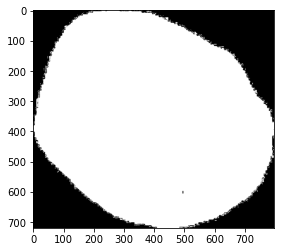

In [3]:
lower = np.array([1, 1, 1])
higher = np.array([250, 250, 250])

mask = cv2.inRange(img, lower, higher)

plt.imshow(mask, 'gray')

Having done so, we can find the contour of the log (here plotted together with the original image):

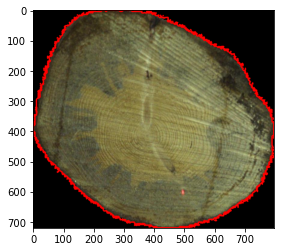

In [4]:
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

contoursimage = cv2.drawContours(img, contours, -1, 255, 3)
plt.imshow(contoursimage)

Now we should find the center of mass for this log. My idea is to use scipy.ndimage.measurements.center_of_mass from scipy.ndimage package, which you can read more about here: https://docs.scipy.org/doc/scipy/reference/ndimage.html

We plot the center of mass for the log together with the black and white picture of the log:

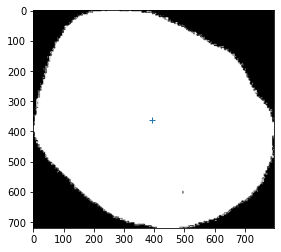

In [5]:
mask = np.array(mask)
COM = ndimage.measurements.center_of_mass(mask)
plt.plot(COM[1], COM[0], '+')
plt.imshow(mask, 'gray')
plt.show()

Now we try to reconstruct this idea with another log:

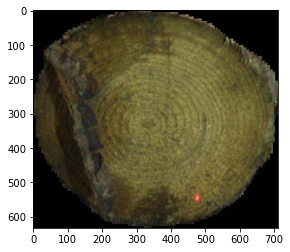

In [6]:
img = cv2.imread(r'C:\Users\Dag Bjornberg\Pictures\Saved Pictures\Log5.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

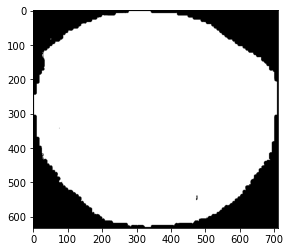

In [18]:
lower = np.array([1, 1, 1])
higher = np.array([250, 250, 250])

mask = cv2.inRange(img, lower, higher)


plt.imshow(mask, 'gray')


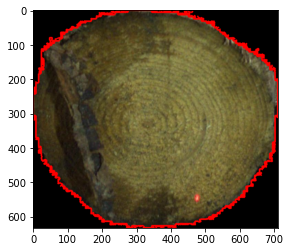

In [8]:
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

contoursimage = cv2.drawContours(img, contours, -1, 255, 3)
plt.imshow(contoursimage)

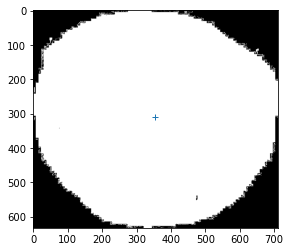

In [9]:
mask = np.array(mask)
COM = ndimage.measurements.center_of_mass(mask)
plt.plot(COM[1], COM[0], '+')
plt.imshow(mask, 'gray')
plt.show()

Now we try to find the center of mass of all logs.

We start by loading the dataset and plot the first 20 images.

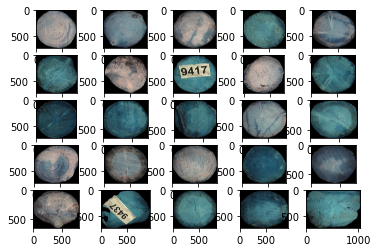

In [10]:


folders = glob.glob(r'C:\Users\Dag Bjornberg\Downloads\LogData*')
imagenames_list = []
for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
        imagenames_list.append(f)

read_images = []        
for image in imagenames_list:
    read_images.append(cv2.imread(image, cv2.COLOR_BGR2RGB))

for i in range(25):
    #define subplot
    plt.subplot(5, 5, i+1)
    plt.imshow(read_images[i])

plt.show()
    


Finding the center of mass for all logs:

In [11]:
lower = np.array([1, 1, 1])
higher = np.array([250, 250, 250])

N = len(read_images) #number of images
COM = np.zeros((N,2)) #storing vector for center of mass values
for i in range(N):

    mask = cv2.inRange(read_images[i], lower, higher)

    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    contoursimage = cv2.drawContours(read_images[i], contours, -1, 255, 3)

    mask = np.array(mask)
    COM[i,:] = ndimage.measurements.center_of_mass(mask)
    

Plotting center of mass together with the original pictures (with contours) for the last 10 logs:

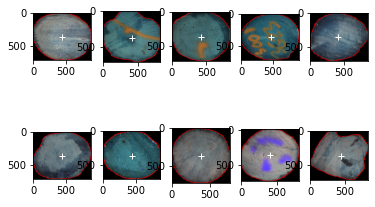

In [12]:
for i in range(10):
    #define subplot
    plt.subplot(2, 5, i+1)
    plt.imshow(read_images[N-i-1])
    plt.plot(COM[N-i-1,1], COM[N-i-1,0], '+', color='w')
plt.show()
    

Creating methods:
get_center_of_mass(image): finds the center of mass for an image by first converting it to a grayscale image.
get_center_of_mass_from_grayscale_image(grayscale_image): finds the center of mass for a grayscale image.
plot_center_of_mass(image): plots the center of mass.

In [51]:
def get_center_of_mass(image):
    grayscale_image = cv2.inRange(image, lower, higher)
    return get_center_of_mass_from_grayscale_image(grayscale_image)

def get_center_of_mass_from_grayscale_image(grayscale_image):
    y, x = ndimage.measurements.center_of_mass(grayscale_image)
    return x, y

def plot_center_of_mass(image):
    plt.plot(get_center_of_mass(image)[0], get_center_of_mass(image)[1], '+', color='w')
    plt.imshow(image)
    plt.show()

Testing:

(414.3347521655386, 349.00765693804624)


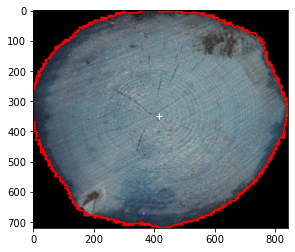

None


In [52]:
print(get_center_of_mass(read_images[1]))
print(plot_center_of_mass(read_images[1]))